Excercise sheet 2
===
Machine Intelligence 2, SoSe 2016, The Nebenhörers:
---

Danijar Hafner

Thomas Kellermeier

Patrick Kuhn

Jan Szynal

In [274]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Excercise 2.1: PCA: 2-dimensional Toy Data
---

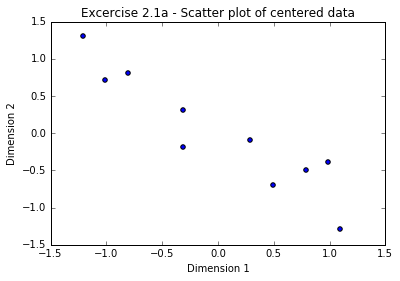

In [275]:
f = open('pca-data-2d.dat.txt')
data = pd.read_table(f, header=None, sep='   ',lineterminator='\n', engine='python')

#center
data = data - data.mean()

#plot
ax = data.plot(kind='scatter', x=0, y=1, title='Excercise 2.1a - Scatter plot of centered data')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2');

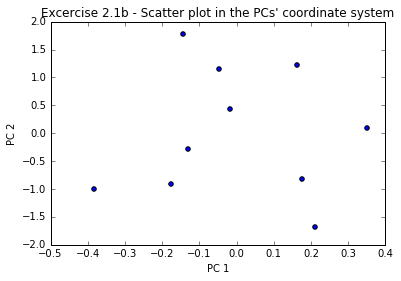

In [276]:
# calculate eigenvectors and eigenvalues
covmat = data.cov()
eigvals, eigvecs = np.linalg.eigh(covmat)

#transform into the coordinate system of the PCAs
datan = np.dot(eigvecs, data.T).T
datan = pd.DataFrame(datan)

#plot
ax = datan.plot(kind='scatter', x=0, y=1, title='Excercise 2.1b - Scatter plot in the PCs\' coordinate system');
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2');

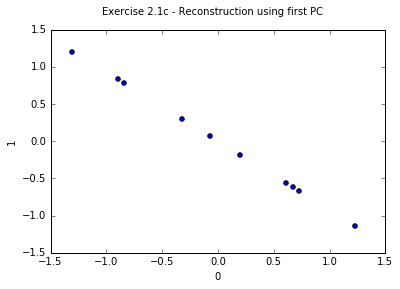

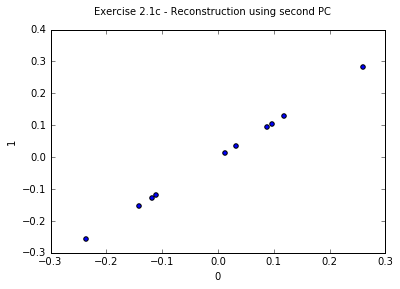

In [277]:
#reconstruction using the first principal component
datan = np.dot(eigvecs[1], data.T)
d = datan.reshape(10,1)
eig = eigvecs[1].reshape(2,1)
datan = np.dot(d,eig.T)

datan = pd.DataFrame(datan)
datan.plot(subplots=True, kind='scatter', x=0, y=1, title='Exercise 2.1c - Reconstruction using first PC')

#reconstruction using the second principal component
datan = np.dot(eigvecs[0], data.T)
d = datan.reshape(10,1)
eig = eigvecs[0].reshape(2,1)
datan = np.dot(d,eig.T)

datan = pd.DataFrame(datan)
datan.plot(subplots=True, kind='scatter', x=0, y=1, title='Exercise 2.1c - Reconstruction using second PC');

Excercise 2.2: PCA: 3-dimensional Toy Data
---

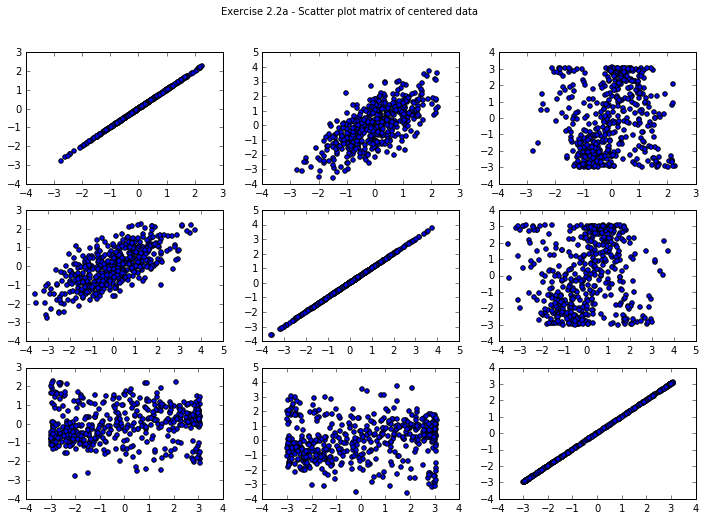

In [278]:
f = open('pca-data-3d.txt')
data = pd.read_table(f, sep=',',lineterminator='\n')

#center
data = data - data.mean()

def scatter_plot_matrix(data, title='Scatter Matrix'):
    data = data.as_matrix() if hasattr(data, 'as_matrix') else data
    rank = data.shape[1]
    fig, ax = plt.subplots(nrows=rank, ncols=rank, figsize=(12, 8))
    fig.suptitle(title)
    for x, y in itertools.product(range(rank), repeat=2):
        ax[x, y].scatter(data[:, x], data[:, y])

scatter_plot_matrix(data.as_matrix(), 'Exercise 2.2a - Scatter plot matrix of centered data')

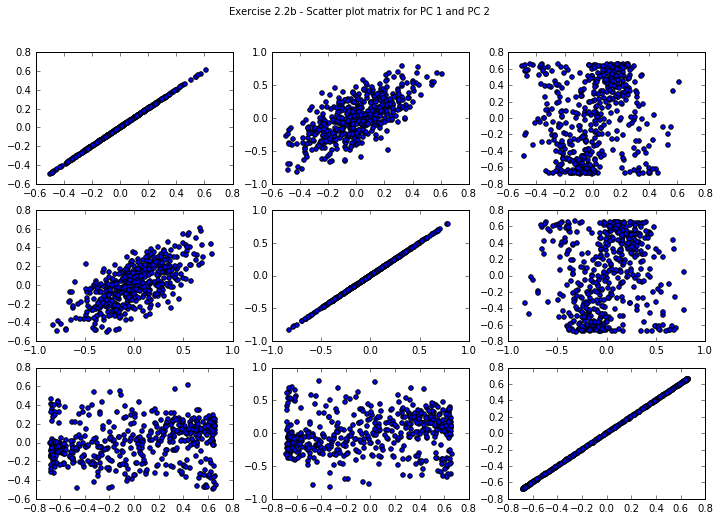

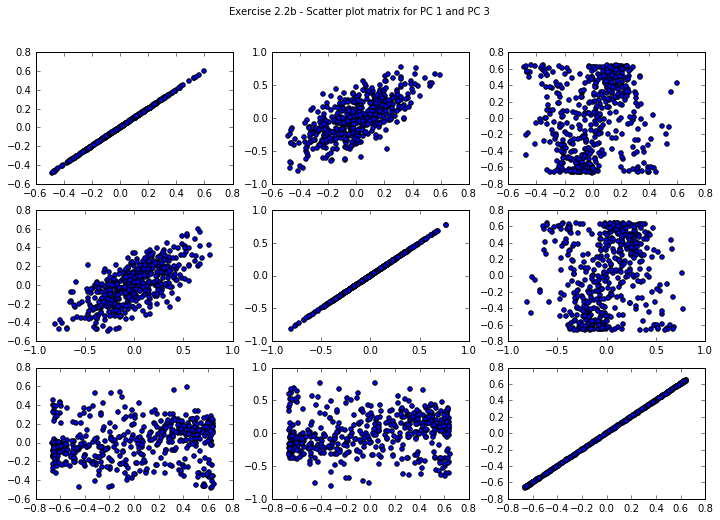

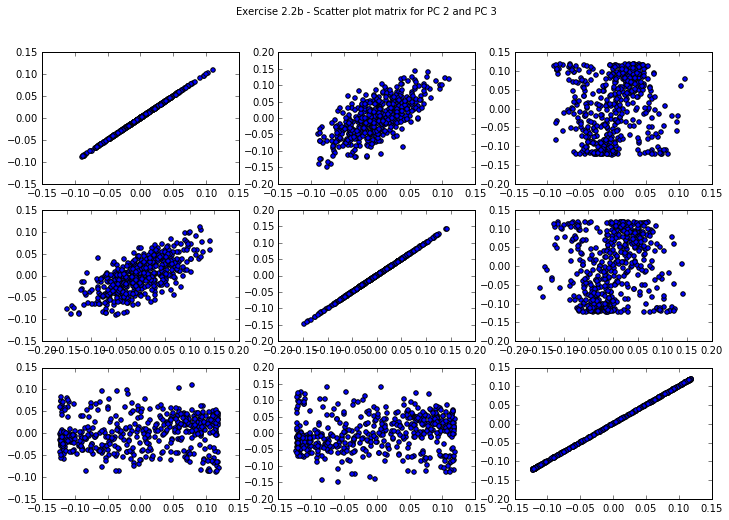

In [279]:
#calculate eigenvectors and eigenvalues
covmat = data.cov()
eigvals, eigvecs = np.linalg.eigh(covmat)

eigvecs = eigvecs[::-1]


#for every combination of the three PCs, make a scatter plot
for comb in itertools.combinations(range(3), 2):
    transformed = np.dot(eigvecs[comb],data.T).T
    data = pd.DataFrame(transformed)
    scatter_plot_matrix(data, title="Exercise 2.2b - Scatter plot matrix for PC {} and PC {}".format(comb[0]+1,comb[1]+1))

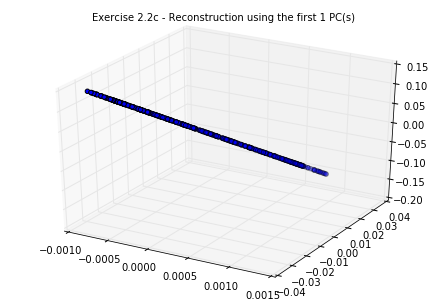

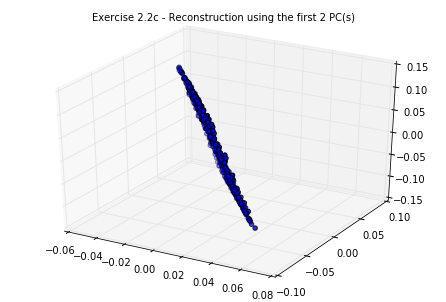

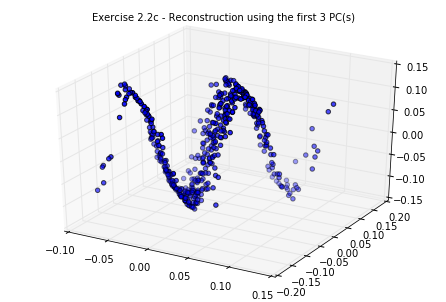

In [280]:
#2.2C 
for num_pcs in range(3):
    pcs = eigvecs[0:num_pcs+1]
    
    transformed = np.dot(pcs,data.T).T
    reconstructed = np.dot(pcs.T, transformed.T).T

    fig = plt.figure()
    ax = Axes3D(fig)
    fig.suptitle("Exercise 2.2c - Reconstruction using the first {} PC(s)".format(num_pcs+1))
    
    ax.scatter(reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2])

Reconstruction based on all three principal components creates a representation that exactly matches the original data (no information is lost). 

Reconstructions based on just one or just two of them do not preserve enough information to aptly represent the original distribution of the data.

This is because the data is highly nonlinear, which PCA doesn't do well at representing.

Excercise 2.3: Projections of a dynamical system
---

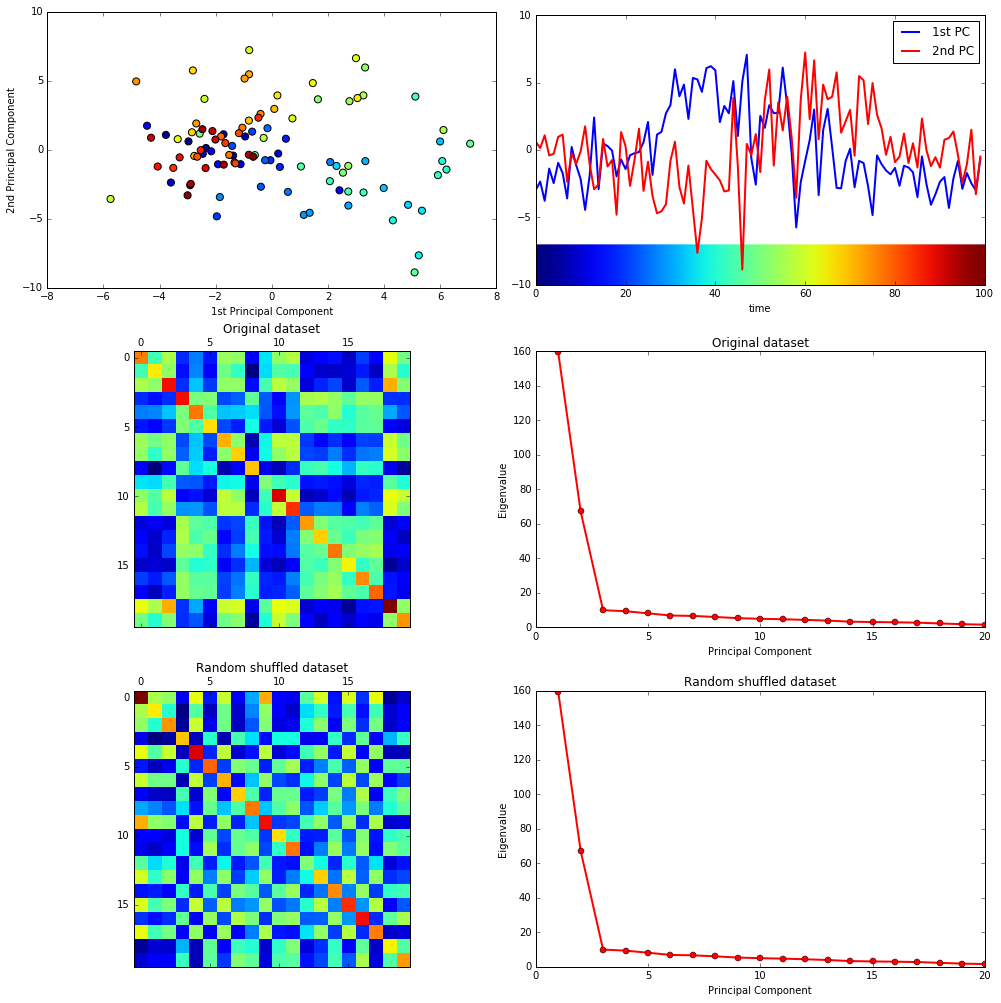

In [281]:
# 2.3(a)
data = pd.read_csv("expDat.txt", index_col=0).as_matrix()
data = data.astype(float)
data -= data.mean(axis=0)

cov = np.cov(data.T)
_, eigvecs = np.linalg.eigh(cov)
eigvecs = eigvecs[::-1]

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(14, 14))
timesteps = np.linspace(0, 1, 100)

# 2.3(b)i)
datan = np.dot(eigvecs[:2], data.T).T
ax[0, 0].scatter(datan[:, 0], datan[:, 1], c=timesteps, s=50)
ax[0, 0].set_xlabel('1st Principal Component')
ax[0, 0].set_ylabel('2nd Principal Component')

# 2.3(b)ii)
datan = np.dot(eigvecs[0], data.T).T
ax[0, 1].plot(np.arange(100), datan, c='blue', label='1st PC', linewidth=2)
datan = np.dot(eigvecs[1], data.T).T
ax[0, 1].plot(np.arange(100), datan, c='red', label='2nd PC', linewidth=2)
ax[0, 1].imshow([np.linspace(0, 1, 20), np.linspace(0, 1, 20)], cmap=plt.cm.jet, interpolation='bicubic', extent=[0, 100, -10, -7], aspect=3)
ax[0, 1].axis((0, 100, -10, 10))
ax[0, 1].legend()
ax[0, 1].set_xlabel('time')

# 2.3(c)
new_data = np.random.RandomState(0).permutation(data.T).T

# 2.3(d)
def plot_cov_and_scree(data, index, title):
    cov = np.cov(data.T)
    ax[index, 0].matshow(cov)
    ax[index, 0].set_title(title)
    eigvals, eigvecs = np.linalg.eigh(cov)
    sing_vals = np.arange(len(eigvals)) + 1
    ax[index, 1].plot(sing_vals, eigvals[::-1], 'ro-', linewidth=2)
    ax[index, 1].set_title(title)
    ax[index, 1].set_xlabel('Principal Component')
    ax[index, 1].set_ylabel('Eigenvalue')

plot_cov_and_scree(data, 1, 'Original dataset')
plot_cov_and_scree(new_data, 2, 'Random shuffled dataset')

fig.tight_layout()

Ad. 2.3(d)

While the covariance matrices for scrambled data differ significantly, the scree plots remain the same. This means that shuffling does not affect the eigenvalues of the matrix.






Ad. 2.3(e)


Mean, covariance matrix, eigenvectors, eigenvalues and finally the scree plot would
be the same because we only change the order of the collected data not the values
themselves. A data point still has the same values for each dimension.

Excercise 2.4: PCA: Image Data
---

In [282]:
import random

def sample_patches(images, count=5000, size=16):
    patches = np.empty((count, size, size))
    for i in range(count):
        image = random.choice(images)
        x = int(random.random() * (image.shape[0] - size))
        y = int(random.random() * (image.shape[1] - size))
        patches[i] = image[x: x + size, y: y + size]
    return patches

In [283]:
def show_patches(patches, rows, cols, title='Patches', size=10):
    assert len(patches) == rows * cols
    fig, ax = plt.subplots(
        nrows=rows, ncols=cols, figsize=(size, size / cols * rows),
        subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle(title)
    for x, y in itertools.product(range(rows), range(cols)):
        patch = patches[x * cols + y]
        ax[x, y].get_xaxis().set_visible(False)
        ax[x, y].imshow(patch, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

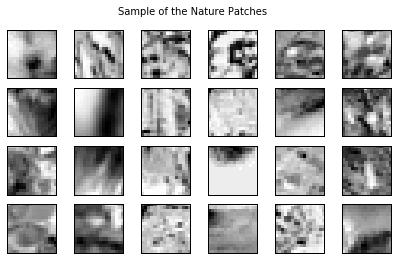

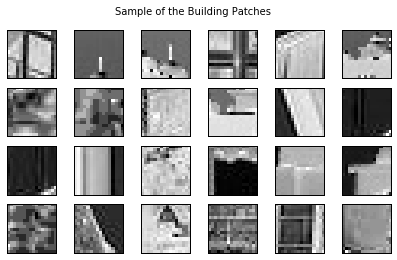

In [284]:
import glob
from scipy import ndimage

nature = [ndimage.imread(x) for x in glob.glob('imgpca/n*.jpg')]
buildings = [ndimage.imread(x) for x in glob.glob('imgpca/b*.jpg')]

nature = sample_patches(nature, 5000)
buildings = sample_patches(buildings, 5000)

show_patches(nature[:24] / 256, 4, 6, 'Sample of the Nature Patches', size=7)
show_patches(buildings[:24] / 256, 4, 6, 'Sample of the Building Patches', size=7)

nature = nature.reshape((len(nature), -1))
buildings = buildings.reshape((len(buildings), -1))

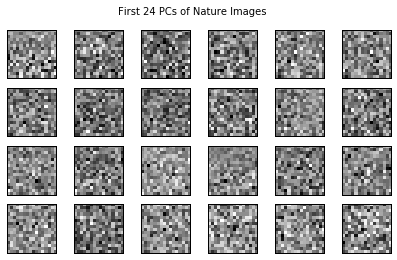

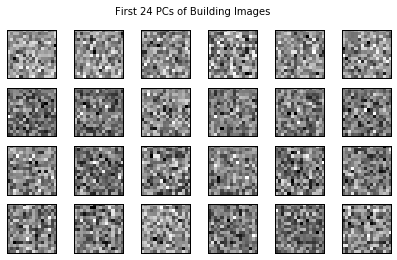

In [285]:
def compute_pcs(data):
    data -= data.mean(axis=0)
    cov = np.cov(data.T)
    eig, pcs = np.linalg.eigh(cov)
    pcs, eig = pcs[::-1], eig[::-1]
    return pcs, eig


nature_pcs, nature_eig = compute_pcs(nature)
buildings_pcs, buildings_eig = compute_pcs(buildings)

nature_pcs_images = nature_pcs.reshape((-1, 16, 16))
show_patches(nature_pcs_images[:24], 4, 6, 'First 24 PCs of Nature Images', size=7)

buildings_pcs_images = buildings_pcs.reshape((-1, 16, 16))
show_patches(buildings_pcs_images[:24], 4, 6, 'First 24 PCs of Building Images', size=7)

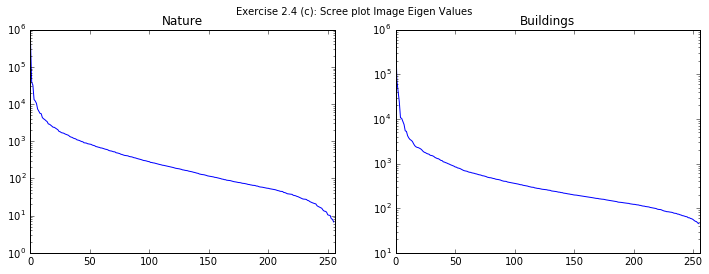

In [286]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
fig.suptitle('Exercise 2.4 (c): Scree plot Image Eigen Values')

ax[0].set_title('Nature')
ax[0].plot(nature_eig)
ax[0].set_yscale('log')
ax[0].set_xlim(0, 256)

ax[1].set_title('Buildings')
ax[1].plot(buildings_eig)
ax[1].set_yscale('log')
ax[1].set_xlim(0, 256)

plt.show()

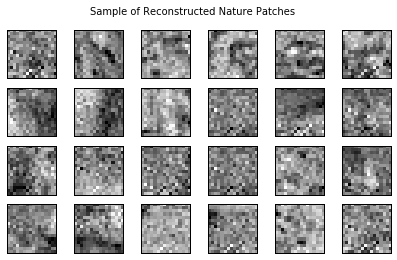

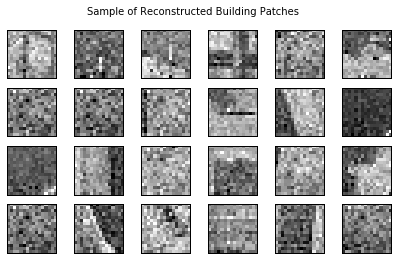

In [287]:
nature_subspace = nature_pcs[:200]
nature_rec = np.dot(nature_subspace.T, np.dot(nature_subspace, nature.T)).T
nature_rec = nature_rec.reshape((-1, 16, 16))
show_patches(nature_rec[:24] / 256, 4, 6, 'Sample of Reconstructed Nature Patches', size=7)

buildings_subspace = buildings_pcs[:200]
buildings_rec = np.dot(buildings_subspace.T, np.dot(buildings_subspace, buildings.T)).T
buildings_rec = buildings_rec.reshape((-1, 16, 16))
show_patches(buildings_rec[:24] / 256, 4, 6, 'Sample of Reconstructed Building Patches', size=7)

In the scree plots, no hard drop-off is visible. Also, reducing the dimensionality of patches only slightly already drastically impacts the quality. We conclude that photographs cannot effectively be represented in linear space.